## 1. Data and library imports:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define the file path
file_path = r'C:\Users\Ankit\OneDrive\Documents\CareerFoundry\Final Projects\WHO MORTALITY\Data\Cleaned Data\cleaned_life_expectancy_data.csv'

# Use Pandas to read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the import
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [27]:
# Define the path where you want to save the DataFrame with the new variable
save_path = r'C:\Users\Ankit\OneDrive\Documents\CareerFoundry\Final Projects\WHO MORTALITY\Data\Cleaned Data\cleaned_life_expectancy_data_with_total_vaccinations.csv'

# Save the DataFrame to the specified path
df.to_csv(save_path, index=False)


# Here we will further explore the hypothesis that, the more vaccinations a country has, the higher the life expectancy we can predict by using supervised machine learning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [5]:
# Create the 'total_vaccinations' variable
df['total_vaccinations'] = df['Hepatitis_B'] + df['Measles'] + df['Polio'] + df['Diphtheria']

# Verify the new column
print(df[['total_vaccinations', 'Hepatitis_B', 'Measles', 'Polio', 'Diphtheria']].head())


   total_vaccinations  Hepatitis_B  Measles  Polio  Diphtheria
0                 356           97       65     97          97
1                 385           97       94     97          97
2                 226           60       35     67          64
3                 352           93       74     92          93
4                 374           97       89     94          94


In [7]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,total_vaccinations
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5,356
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8,385
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4,226
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0,352
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7,374


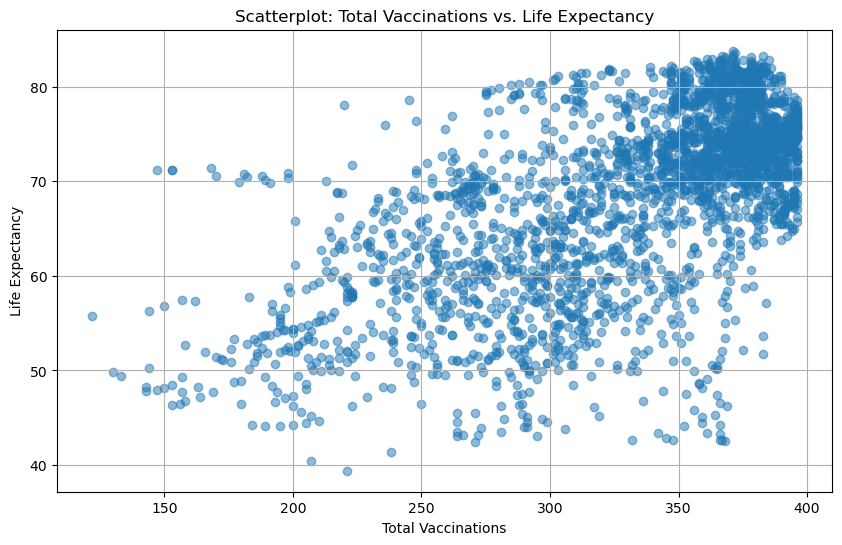

In [8]:
import matplotlib.pyplot as plt

# Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['total_vaccinations'], df['Life_expectancy'], alpha=0.5)
plt.title('Scatterplot: Total Vaccinations vs. Life Expectancy')
plt.xlabel('Total Vaccinations')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a linear regression model
model = LinearRegression()

# Define the independent and dependent variables
X = df[['total_vaccinations']]
y = df['Life_expectancy']

# Fit the model
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)

# Calculate the R2 score
r2 = r2_score(y, y_pred)

# Print the R2 score
print(f'R2 Score: {r2:.4f}')


R2 Score: 0.4034


In [9]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['total_vaccinations'].values.reshape(-1,1)
y = df['Life_expectancy'].values.reshape(-1,1)

In [10]:
X

array([[356],
       [385],
       [226],
       ...,
       [351],
       [381],
       [368]], dtype=int64)

In [11]:
y

array([[76.5],
       [82.8],
       [65.4],
       ...,
       [74.3],
       [71.8],
       [82.4]])

In [12]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 5. Regression analysis:


In [13]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [14]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

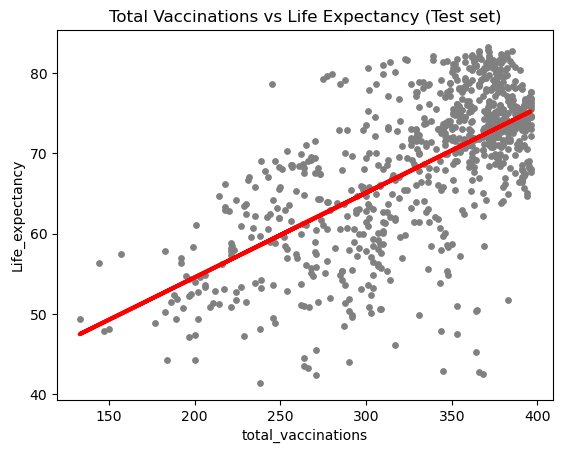

In [16]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Vaccinations vs Life Expectancy (Test set)')
plot_test.xlabel('total_vaccinations')
plot_test.ylabel('Life_expectancy')
plot_test.show()

In [17]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [18]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.10561008]]
Mean squared error:  47.277206246068985
R2 score:  0.44994253045579125


In [19]:
y_predicted

array([[57.70565864],
       [64.99275437],
       [65.94324512],
       [54.32613599],
       [74.70888201],
       [54.00930574],
       [67.21056612],
       [73.5471711 ],
       [71.54057952],
       [62.03567205],
       [74.49766185],
       [75.23693243],
       [67.3161762 ],
       [72.9135106 ],
       [54.53735615],
       [62.14128213],
       [71.75179969],
       [49.256852  ],
       [75.23693243],
       [74.1808316 ],
       [74.92010218],
       [70.69569886],
       [71.01252911],
       [72.70229044],
       [69.53398794],
       [71.75179969],
       [75.23693243],
       [73.5471711 ],
       [63.61982329],
       [70.27325853],
       [65.73202495],
       [75.13132235],
       [72.17424002],
       [54.64296623],
       [69.85081819],
       [73.5471711 ],
       [69.53398794],
       [64.04226363],
       [72.59668035],
       [74.60327193],
       [74.8144921 ],
       [66.47129554],
       [57.60004856],
       [73.33595093],
       [69.95642828],
       [70

In [20]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,51.5,57.705659
1,68.1,64.992754
2,66.1,65.943245
3,52.5,54.326136
4,66.7,74.708882
5,54.7,54.009306
6,74.1,67.210566
7,64.1,73.547171
8,75.3,71.540580
9,57.5,62.035672


In [21]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [22]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [23]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.10561008]]
Mean squared error:  55.15336242093862
R2 score:  0.38357981713427436


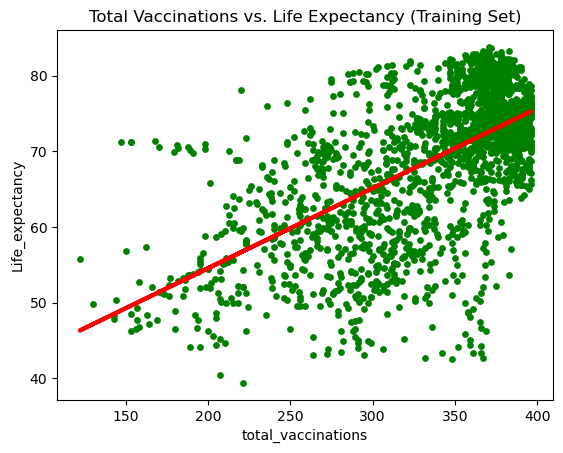

In [26]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total Vaccinations vs. Life Expectancy (Training Set)')
plot_test.xlabel('total_vaccinations')
plot_test.ylabel('Life_expectancy')
plot_test.show()

## While this model may not be reliable, it only partially proves the hypothesis that the more vaccination a country has the higher the life expectancy it will have aslo, the r score is not high enough to make it a strong correlation